# Poisson Thompson Sampling Experiment

### Import Modules

In [1]:
from thompson_sampling.poisson import PoissonExperiment
from thompson_sampling.priors import GammaPrior
from pandas import Series

### Create Priors and Instantiate Experiment with Priors

In [2]:
means = Series([100, 110, 75])
variances = Series([75, 200, None])
effective_sizes = Series([None, None, 3])
labels = Series(["option1", "option2", "option3"])

In [3]:
pr = GammaPrior()
pr.add_multiple(means, variances, effective_sizes, labels)
pr.priors

{'option1': {'shape': 133.0, 'scale': 0.75},
 'option2': {'shape': 60.0, 'scale': 1.818},
 'option3': {'shape': 225.0, 'scale': 0.333}}

In [4]:
experiment = PoissonExperiment(priors = pr)

### Choose arms for the next experiment

In [5]:
experiment.choose_arm()

'option2'

In [6]:
experiment.choose_arm()

'option2'

### Simulate posterior predictive distributions for all labels

In [7]:
experiment.get_ppd(size = 5000) # size is the number of values to simulate for the distributions

[{'Label': 'option1', '95% Credible Interval': (75.0, 127.0), 'mean': 99.609},
 {'Label': 'option2', '95% Credible Interval': (77.0, 145.0), 'mean': 109.071},
 {'Label': 'option3', '95% Credible Interval': (56.0, 95.0), 'mean': 74.65}]

We can see the different distributions of the posterior predictives based on the current posterior

### Update the options by providing the rewards


In [8]:
rewards = [{"label":"option1", "reward":150},{"label":"option2", "reward":30},{"label":"option2", "reward":10}]
experiment.add_rewards(rewards)

In [9]:
experiment.get_ppd(size=5000)

[{'Label': 'option1', '95% Credible Interval': (96.0, 148.0), 'mean': 121.415},
 {'Label': 'option2', '95% Credible Interval': (26.0, 55.0), 'mean': 39.249},
 {'Label': 'option3', '95% Credible Interval': (56.0, 95.0), 'mean': 74.984}]

We can see that the percentages for "option1" and "option2" have changed with the added information

### View distribution of the posteriors

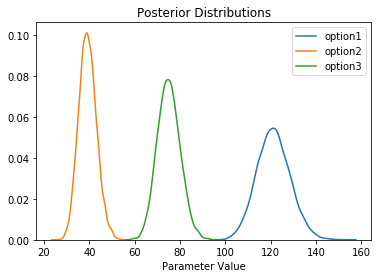

In [10]:
experiment.plot_posterior()